In [78]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns

1. Import and little analysis of the data

In [79]:
sys.path.append('..')
from src.load_data import read_tables, tidy_and_split_data

In [80]:
df = read_tables("../data")
tidy_df, X, y = tidy_and_split_data(df, dropna=False)
tidy_df

,h,H,R
759,15.50,20.5,NaN
690,17.80,20.5,NaN
691,17.80,20.5,NaN
692,17.80,20.5,NaN
693,17.80,20.5,NaN
...,...,...,...
543,15.10,55.0,NaN
544,15.10,55.0,NaN
545,15.05,55.0,NaN
523,17.90,55.0,NaN


In [81]:
tidy_df.describe()

,h,H,R
count,1615.000000,1615.000000,400.000000
mean,16.702632,34.352941,25.782975
std,1.304393,9.049681,7.047815
min,15.050000,20.500000,13.500000
25%,15.100000,28.000000,21.250000
50%,17.700000,34.500000,24.850000
75%,17.800000,39.000000,30.700000
max,17.900000,55.000000,40.450000


In [82]:
tidy_df.h.value_counts()

h
17.80    510
17.90    255
15.05    255
15.10    255
15.50    170
17.70    170
Name: count, dtype: int64

In [83]:
tidy_df.isna().sum()

h       0
H       0
R    1215
dtype: int64

<Axes: xlabel='R', ylabel='Count'>

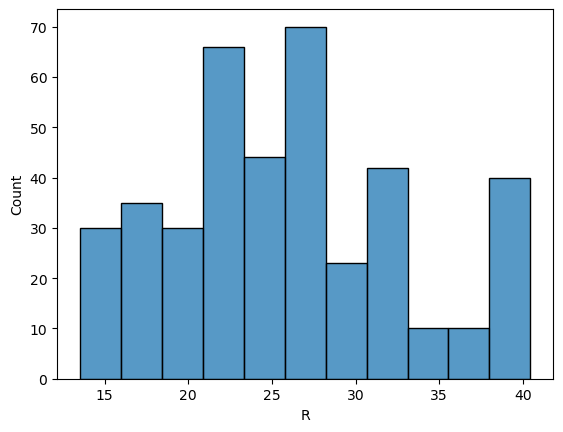

In [84]:
sns.histplot(data=tidy_df, x='R',)

In [85]:
spearman_corr = tidy_df.corr(method='spearman')

<Axes: >

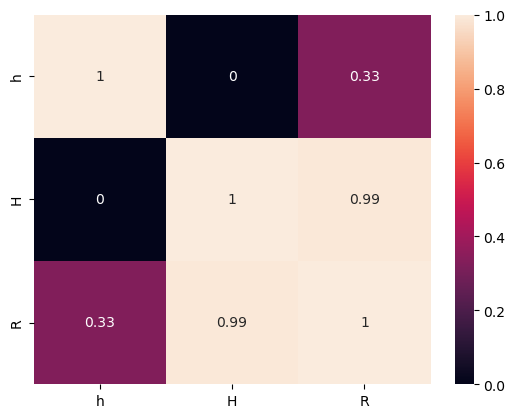

In [86]:
sns.heatmap(data=spearman_corr, annot=True)

2. Analysis with the theorical equation model

In [87]:
def theorical_range(H: float, h: float, rotation: bool=True) -> float:
  rotationValue = 5/7 if rotation else 1
  return 2 * np.sqrt(rotationValue*(h*(H - h)))

<Axes: xlabel='H', ylabel='R'>

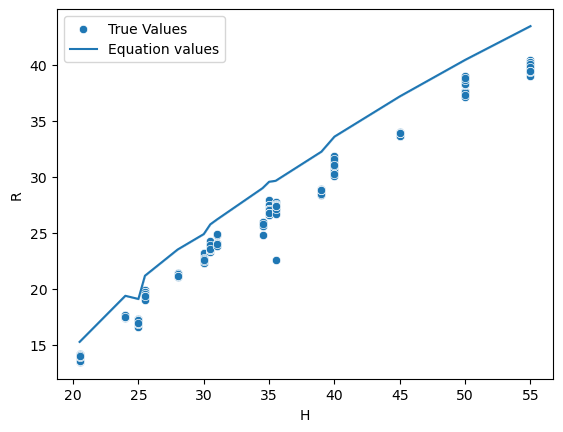

In [88]:
sns.scatterplot(data=tidy_df.dropna(), x='H', y='R', label='True Values')
sns.lineplot(data=tidy_df.dropna(), x=tidy_df.dropna().H.values, y=theorical_range(H=tidy_df.dropna().H.values, h=tidy_df.dropna().h.values), label='Equation values')

In [89]:
from sklearn.metrics import mean_absolute_error

In [90]:
H_t = tidy_df.dropna().H.values
h_t = tidy_df.dropna().h.values
theorical_values = theorical_range(H=H_t, h=h_t)

In [91]:
mean_absolute_error(tidy_df.dropna().R, theorical_values)

2.3347707644114446

3. Generative rule based method and analysis

In [92]:
def generate_synthetic_data(row, epsilon: float=2.3347) -> float:
    if not pd.isna(row['R']):
        return row['R']
    return theorical_range(H=row['H'], h=row['h']) - epsilon

In [93]:
synthetic_df = tidy_df.copy()

In [94]:
synthetic_df['R'] = synthetic_df.apply(lambda row: generate_synthetic_data(row), axis=1,)
synthetic_df

,h,H,R
759,15.50,20.5,12.545776
690,17.80,20.5,9.383418
691,17.80,20.5,9.383418
692,17.80,20.5,9.383418
693,17.80,20.5,9.383418
...,...,...,...
543,15.10,55.0,39.155058
544,15.10,55.0,39.155058
545,15.05,55.0,39.112254
523,17.90,55.0,41.224455


<Axes: xlabel='H', ylabel='Count'>

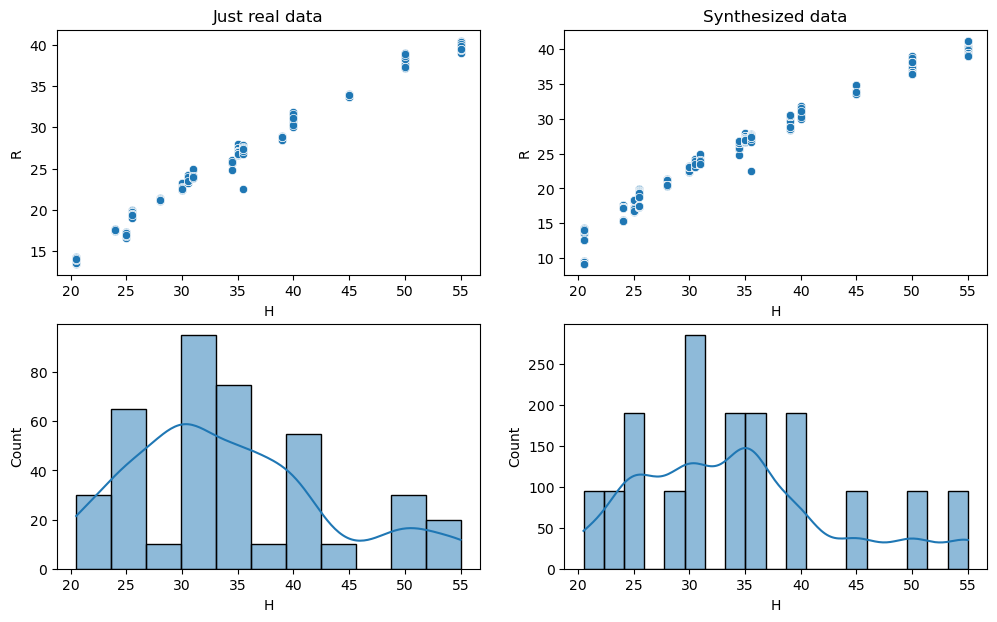

In [103]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

axes[0, 0].set_title("Just real data")
sns.scatterplot(data=tidy_df.dropna(), x='H', y='R', ax=axes[0, 0])

axes[0, 1].set_title("Synthesized data")
sns.scatterplot(data=synthetic_df, x='H', y='R', ax=axes[0, 1])

sns.histplot(data=tidy_df.dropna(), x='H', ax=axes[1, 0], kde=True)
sns.histplot(data=synthetic_df, x='H', ax=axes[1, 1], kde=True)